<center><img src="../../logo.png" alt="Header" style="width: 800px;"/></center>

@Copyright (C): 2010-2022, Shenzhen Yahboom Tech  
@Author: Liusen  
@Date: 2020-02-22 15:01:00 
@LastEditors: Liusen  
@LastEditTime: 2020-02-22 15:01:00 

# 中值滤波 3*3 

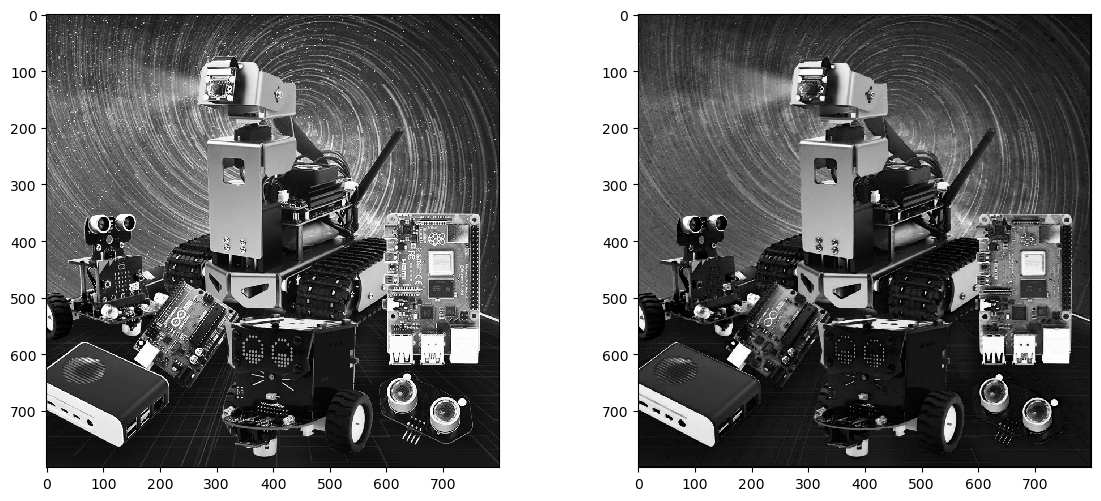

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('yahboom.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# cv2.imshow('src',img)
dst = np.zeros((height,width,3),np.uint8)
collect = np.zeros(9,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        k = 0
        for m in range(-1,2):
            for n in range(-1,2):
                gray = img[i+m,j+n]
                collect[k] = gray
                k = k+1
        # 0 1 2 3 4 5 6 7 8
        #   1 
        for k in range(0,9):
            p1 = collect[k]
            for t in range(k+1,9):
                if p1<collect[t]:
                    mid = collect[t]
                    collect[t] = p1
                    p1 = mid
        dst[i,j] = collect[4]
# cv2.imshow('dst',dst)
# cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 6), dpi=100) #设置绘图区域的大小和像素
plt.subplot(121)  # 一行二列第一个
plt.imshow(img)
plt.subplot(122)  # 一行二列第二个
plt.imshow(dst)
plt.show()
